### Filter By Boro

In [3]:
import pandas as pd
df = pd.read_csv('data/data.csv')
df = df[df.BORO_NM=="MANHATTAN"]
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/data.csv'

### Issue 1 - Interesting Crime 

In [20]:
df = pd.read_csv('data/data.csv')
df = df[df.OFNS_DESC=="FORGERY"]
df.sort_values("PREM_TYP_DESC")
df

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
43,283046394,1,MANHATTAN,01/01/2024,12:00:00,03/01/2024,14:49:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,982380.0,197844.0,40.709715,-74.006744,"(40.709715, -74.006744)",POINT (-74.006744 40.709715)
140,279794668,18,MANHATTAN,01/01/2024,22:10:00,01/01/2024,22:15:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,988669.0,216684.0,40.761423,-73.984048,"(40.7614228372042, -73.9840483917395)",POINT (-73.9840483917395 40.7614228372042)
306,283795860,79,BROOKLYN,01/01/2024,00:00:00,03/14/2024,18:30:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,998477.0,191688.0,40.692805,-73.948695,"(40.692805, -73.948695)",POINT (-73.948695 40.692805)
378,279789943,81,BROOKLYN,01/01/2024,16:47:00,01/01/2024,17:06:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,1004919.0,187068.0,40.680111,-73.925480,"(40.680111039841414, -73.92548046570226)",POINT (-73.92548046570226 40.680111039841414)
564,279786364,41,BRONX,01/01/2024,16:27:00,01/01/2024,16:35:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,1014249.0,238403.0,40.820986,-73.891613,"(40.82098580550746, -73.8916133211247)",POINT (-73.8916133211247 40.82098580550746)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133509,284584352,13,MANHATTAN,03/31/2024,17:43:00,03/31/2024,18:04:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,988276.0,210451.0,40.744317,-73.985470,"(40.744317, -73.98547)",POINT (-73.98547 40.744317)
133658,284588498,24,MANHATTAN,03/31/2024,21:55:00,03/31/2024,22:00:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,995643.0,230619.0,40.799665,-73.958848,"(40.799665, -73.958848)",POINT (-73.958848 40.799665)
133778,286387410,63,BROOKLYN,03/31/2024,12:00:00,04/04/2024,12:00:00,COMPLETED,(null),NaN,...,NaN,65+,WHITE,F,1011447.0,162943.0,40.613877,-73.902040,"(40.613877, -73.90204)",POINT (-73.90204 40.613877)
134374,284562245,103,QUEENS,03/31/2024,02:20:00,03/31/2024,02:27:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,1037244.0,195024.0,40.701814,-73.808874,"(40.70181387328086, -73.80887433026759)",POINT (-73.80887433026759 40.70181387328086)


<br>### Issue 2 - Join Crimes and Arrests<br>

In [2]:
import pandas as pd
df_1 = pd.read_csv('data/arrests.csv')
df_1.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [3]:
df_2 = pd.read_csv('data/crimes.csv')
df_2.columns
df_2.head(5)

,Unnamed: 0,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,51870,282411683,60,BROOKLYN,02/18/2024,12:10:00,02/18/2024,12:18:00,COMPLETED,(null),...,NaN,UNKNOWN,UNKNOWN,E,990148.0,155255.0,40.592813,-73.978763,"(40.592813307614215, -73.97876328945328)",POINT (-73.97876328945328 40.592813307614215)
1,116441,279933201,18,MANHATTAN,01/04/2024,00:15:00,01/04/2024,00:25:00,COMPLETED,(null),...,NaN,25-44,WHITE,F,988757.0,216332.0,40.760457,-73.983731,"(40.76045664314996, -73.98373096728758)",POINT (-73.98373096728758 40.76045664314996)
2,23539,281846733,20,MANHATTAN,09/07/2023,23:35:00,12/01/2023,12:00:00,COMPLETED,(null),...,NaN,65+,WHITE,M,989200.0,222851.0,40.778351,-73.982126,"(40.778351, -73.982126)",POINT (-73.982126 40.778351)
3,188022,281559921,75,BROOKLYN,01/30/2024,15:50:00,01/30/2024,15:56:00,COMPLETED,(null),...,NaN,25-44,BLACK HISPANIC,M,1016845.0,182111.0,40.666469,-73.882507,"(40.666469319202875, -73.8825067547414)",POINT (-73.8825067547414 40.666469319202875)
4,193201,286123283,50,BRONX,04/29/2024,01:00:00,04/30/2024,11:15:00,COMPLETED,(null),...,NaN,25-44,WHITE HISPANIC,F,1011088.0,271303.0,40.911299,-73.902901,"(40.911299, -73.902901)",POINT (-73.902901 40.911299)


In [4]:
df_1[['PD_CD','PD_DESC', 'KY_CD', 'OFNS_DESC','LAW_CODE', 'LAW_CAT_CD']]

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD
0,153.0,RAPE 3,104.0,RAPE,PL 1302503,F
1,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F
2,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1201001,F
3,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100A,M
4,223.0,"BURGLARY,RESIDENCE,NIGHT",107.0,BURGLARY,PL 1403002,F
...,...,...,...,...,...,...
128773,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M
128774,779.0,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510D,F
128775,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M
128776,510.0,"CONTROLLED SUBSTANCE, INTENT T",117.0,DANGEROUS DRUGS,PL 2200601,F


In [5]:
df_2[['KY_CD','LAW_CAT_CD','PD_DESC','OFNS_DESC']]

,KY_CD,LAW_CAT_CD,PD_DESC,OFNS_DESC
0,235,MISDEMEANOR,"CONTROLLED SUBSTANCE, POSSESSI",DANGEROUS DRUGS
1,344,MISDEMEANOR,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES
2,109,FELONY,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",GRAND LARCENY
3,348,MISDEMEANOR,LEAVING SCENE-ACCIDENT-PERSONA,VEHICLE AND TRAFFIC LAWS
4,109,FELONY,"LARCENY,GRAND OF VEHICULAR/MOTORCYCLE ACCESSORIES",GRAND LARCENY
...,...,...,...,...
124995,121,FELONY,"MISCHIEF,CRIMINAL, UNCL 2ND",CRIMINAL MISCHIEF & RELATED OF
124996,121,FELONY,"MISCHIEF, CRIMINAL 3 & 2, OF M",CRIMINAL MISCHIEF & RELATED OF
124997,359,MISDEMEANOR,"CONTEMPT,CRIMINAL",OFFENSES AGAINST PUBLIC ADMINI
124998,110,FELONY,"LARCENY,GRAND OF AUTO",GRAND LARCENY OF MOTOR VEHICLE


In [6]:
print(df_1['KY_CD'].dtype)
print(df_2['KY_CD'].dtype)

float64
int64


In [7]:
df_2['KY_CD'] = df_2['KY_CD'].astype(float)

In [8]:
df_1_subset = df_1[['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC','LAW_CODE', 'ARREST_BORO', 'ARREST_PRECINCT','JURISDICTION_CODE']]

In [9]:
df_2_subset = df_2[['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM','JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD','PD_CD', 'PD_DESC']]

In [10]:
df_subset_mg = df_1_subset.merge(df_2_subset, on=['PD_CD','KY_CD'], how='left', suffixes=('_arrest','_crime'))

In [11]:
print(df_subset_mg.head(10))

   ARREST_KEY ARREST_DATE  PD_CD PD_DESC_arrest  KY_CD OFNS_DESC    LAW_CODE  \
0   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
1   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
2   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
3   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
4   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
5   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
6   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
7   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
8   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
9   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   

  ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE_arrest CMPLNT_NUM  \
0           K               77                  

### Issue 3 - NBA Games <br>

In [50]:
import pandas as pd
import sqlite3

con = sqlite3.connect("/Users/kyueunkim/Documents/GitHub/UMD-INST627-Fall2024/data/nba.sqlite")
games = pd.read_sql_query("SELECT * FROM game LIMIT 100", con)
active_players = pd.read_sql_query("SELECT full_name FROM player WHERE is_active=TRUE", con)

In [12]:
games.columns

Index(['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home',
       'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home',
       'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
       'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home',
       'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away',
       'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away',
       'season_type'],
      dtype='object')

In [7]:
games.head(5)

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,0024600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,None,None,None,None,None,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,0024600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,None,None,None,None,None,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,0024600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,None,None,None,None,None,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,0024600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,None,None,None,None,None,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,0024600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,None,None,None,None,None,NaN,50.0,17,0,Regular Season


In [8]:
active_players.head(5)

,full_name
0,Precious Achiuwa
1,Steven Adams
2,Bam Adebayo
3,Ochai Agbaji
4,Santi Aldama


In [14]:
games_recent = pd.read_sql_query("""
    SELECT season_id, season_type, team_name_home, game_Date
    FROM game
    ORDER BY season_id DESC"""
    , con)
games_recent.head(100) 

# Selected Team: Boston Celtics

,season_id,season_type,team_name_home,game_date
0,42022,Playoffs,Sacramento Kings,2023-04-15 00:00:00
1,42022,Playoffs,Boston Celtics,2023-04-15 00:00:00
2,42022,Playoffs,Cleveland Cavaliers,2023-04-15 00:00:00
3,42022,Playoffs,Philadelphia 76ers,2023-04-15 00:00:00
4,42022,Playoffs,Milwaukee Bucks,2023-04-16 00:00:00
...,...,...,...,...
95,42021,Playoffs,Phoenix Suns,2022-04-19 00:00:00
96,42021,Playoffs,Memphis Grizzlies,2022-04-19 00:00:00
97,42021,Playoffs,Miami Heat,2022-04-19 00:00:00
98,42021,Playoffs,Milwaukee Bucks,2022-04-20 00:00:00


In [ ]:
games_sliced = games.iloc[:,8:28]
games_sliced.head(5)

# Selected columns for calculating average score: pts_home, pts_away

In [31]:
games_bc_avg = pd.read_sql_query("""
    SELECT team_name_home, avg(pts_home) AS home_avg, avg(pts_away) AS away_avg
    FROM game
    WHERE team_name_home = 'Boston Celtics'
    """, con)
print(games_bc_avg)

   team_name_home    home_avg    away_avg
0  Boston Celtics  106.278489  100.226633


### Issue 4 - Analytical Questions <br>

#### Business Objective
Which team would be the best to invest in for the upcoming season?

#### Analytical Questions
1. Which teams have most consistently had the highest scores?
2. Which team has had below average for the most consecutive seasons?
3. Which team has consistently made it to the playoffs?
4. Which teams have shown the greatest improvement over the past five years?
5. Which teams have demonstrated the best defensive metrics (e.g., blocks and steals), and how has this impacted their winning consistency?

### Issue 5 - Descripitive Statistics
### Issue 6 - Storyboard 
### Issue 7 - Visualization <br>

In [3]:
import pandas as pd
import sqlite3

con = sqlite3.connect("../data/nba.sqlite")
games = pd.read_sql_query("SELECT * FROM game", con)
active_players = pd.read_sql_query("SELECT full_name FROM player WHERE is_active=TRUE", con)

In [4]:
games.columns

Index(['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home',
       'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home',
       'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
       'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home',
       'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away',
       'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away',
       'season_type'],
      dtype='object')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Which teams have most consistently had the highest scores? <br>

In [156]:
# games data excluding all-star games (2019-2023)

games_recent_5yrs = pd.read_sql_query("""
	SELECT * FROM game 
	WHERE season_type NOT IN ('All Star', 'All-Star') 
	AND game_date BETWEEN '2019-01-01 00:00:00' AND '2023-12-31 23:59:59'
    ORDER BY game_date DESC
""", con)

#### Introduction

Who's the most powerful team in the NBA? In evaluating teams for investment potential, scoring ability has traditionally been a key metric. With NBA scoring increasing in recent seasons, investors need to look deeper than just offensive output. Is a high-scoring offense truly indicative of a team's value and future success?
To identify the most promising investment opportunities for the upcoming season, we analyzed scoring patterns from 2019-2023, examining not just point totals but offensive consistency. This comprehensive analysis aims to uncover teams that demonstrate sustainable excellence.

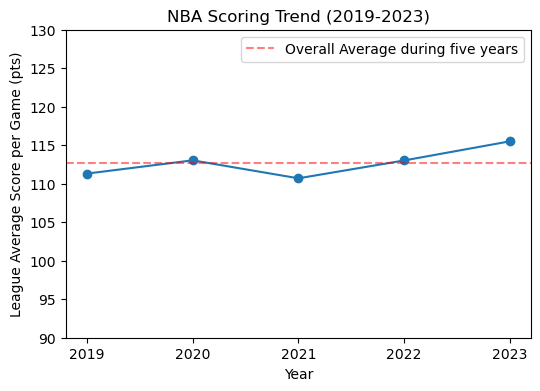

In [161]:
# visualization for Introduction - League average trend

regular_games = games_recent_5yrs[games_recent_5yrs['season_type']=='Regular Season']
games_recent_5yrs['game_year'] = pd.to_datetime(games_recent_5yrs['game_date']).dt.year

plt.figure(figsize=(6,4))
yearly_avg = regular_games.groupby('game_year').agg({
    'pts_home' : 'mean', 'pts_away' : 'mean'}).reset_index()
yearly_avg['points'] = (yearly_avg['pts_home'] + yearly_avg['pts_away'])/2
yearly_avg['game_year'] = yearly_avg['game_year'].astype(int)

plt.plot(yearly_avg['game_year'], yearly_avg['points'], marker='o')
plt.axhline(y=yearly_avg['points'].mean(), color='r', linestyle='--', alpha=0.5, label='Overall Average during five years')
plt.xticks(yearly_avg['game_year'])
plt.ylim(90,130)
plt.title('NBA Scoring Trend (2019-2023)')
plt.xlabel('Year')
plt.ylabel('League Average Score per Game (pts)')
plt.legend()
plt.show()

#### Rising Action

Initial market analysis might attract investors to the Milwaukee Bucks, who lead with an average of 116.44 points per game. However, high performance must be sustainable to ensure reliable returns. Our analysis shows that the top 10 teams all average over 113 points, indicating intense competition and multiple investment opportunities. The key question now is “Which team's offensive success is most sustainable?"

In [158]:
# mean, standard deviation of scores for each team
score_stats_home = games_recent_5yrs.groupby(['team_id_home','team_name_home'])['pts_home'].agg(['mean', 'std', 'count'])
score_stats_away = games_recent_5yrs.groupby(['team_id_away','team_name_away'])['pts_away'].agg(['mean', 'std', 'count'])

score_stats_home.index.names = ['team_id', 'team_name']
score_stats_away.index.names = ['team_id', 'team_name']

combined_stats = pd.concat([score_stats_home, score_stats_away])
score_stats_all = combined_stats.groupby(['team_id', 'team_name']).mean()
score_stats_all['total_games'] = combined_stats.groupby(['team_id', 'team_name'])['count'].sum()
score_stats_all = score_stats_all[score_stats_all['total_games'] >= 100]

# teams with highest average
print("Teams with highest average scores:")
print(score_stats_all.sort_values(by='mean', ascending=False).head(15))

Teams with highest average scores:
                                         mean        std  count  total_games
team_id    team_name                                                        
1610612749 Milwaukee Bucks         116.435716  12.726194  217.0          434
1610612762 Utah Jazz               114.124126  11.353901  196.5          393
1610612737 Atlanta Hawks           114.082051  12.425118  195.0          390
1610612750 Minnesota Timberwolves  114.046378  11.995903  184.0          368
1610612758 Sacramento Kings        113.760321  12.404773  186.5          373
1610612744 Golden State Warriors   113.553368  12.502250  207.5          415
1610612751 Brooklyn Nets           113.466575  12.269783  195.5          391
1610612740 New Orleans Pelicans    113.429579  11.357125  184.5          369
1610612763 Memphis Grizzlies       113.219401  12.564816  196.5          393
1610612756 Phoenix Suns            113.174049  11.591735  205.5          411
1610612743 Denver Nuggets          112.98

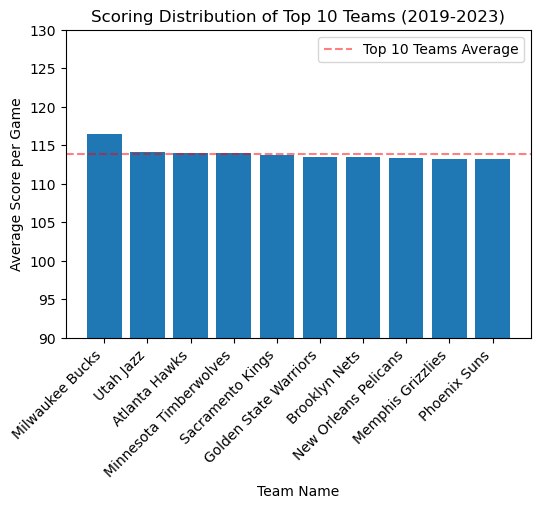

In [159]:
# visualization for Rising action - Top 10 teams scoring
top10_teams_scoring = score_stats_all.reset_index().sort_values(by='mean', ascending=False).head(10)

plt.figure(figsize=(6,4))
plt.bar(top10_teams_scoring['team_name'], top10_teams_scoring['mean'])
plt.xticks(rotation=45, ha='right')
plt.title('Scoring Distribution of Top 10 Teams (2019-2023)')
plt.xlabel('Team Name')
plt.ylabel('Average Score per Game')
plt.ylim(90, 130)

# average line
top10_avg = top10_teams_scoring['mean'].mean()
plt.axhline(y=top10_avg, color='r', linestyle='--', alpha=0.5, label='Top 10 Teams Average')
plt.legend()
plt.show()

#### Climax

The most meaningful insight came when we examined scoring consistency. While the Milwaukee Bucks led in scoring power, the Utah Jazz stood out in offensive efficiency, maintaining a high scoring average (114.12 points) with the league's lowest standard deviation (11.35). This remarkable consistency, coupled with their scoring volume, suggests an optimal balance of return and risk.

Additionally, teams like the New Orleans Pelicans, Phoenix Suns, and Denver Nuggets demonstrated exceptional consistency across over 400 games, despite not leading in raw scoring numbers. This highlights that offensive stability might be just as valuable as scoring power.

In [160]:
# teams with consistent scoring
print("Most consistent scoring teams (lowest standard deviation):")
print(score_stats_all.sort_values(by='std').head(10))

Most consistent scoring teams (lowest standard deviation):
                                         mean        std  count  total_games
team_id    team_name                                                        
1610612762 Utah Jazz               114.124126  11.353901  196.5          393
1610612739 Cleveland Cavaliers     107.244895  11.354891  182.0          364
1610612740 New Orleans Pelicans    113.429579  11.357125  184.5          369
1610612756 Phoenix Suns            113.174049  11.591735  205.5          411
1610612748 Miami Heat              108.997146  11.596273  217.5          435
1610612761 Toronto Raptors         111.561036  11.654833  203.0          406
1610612743 Denver Nuggets          112.986301  11.774490  219.0          438
1610612753 Orlando Magic           107.049138  11.822853  189.0          378
1610612750 Minnesota Timberwolves  114.046378  11.995903  184.0          368
1610612765 Detroit Pistons         106.855801  11.997323  183.0          366


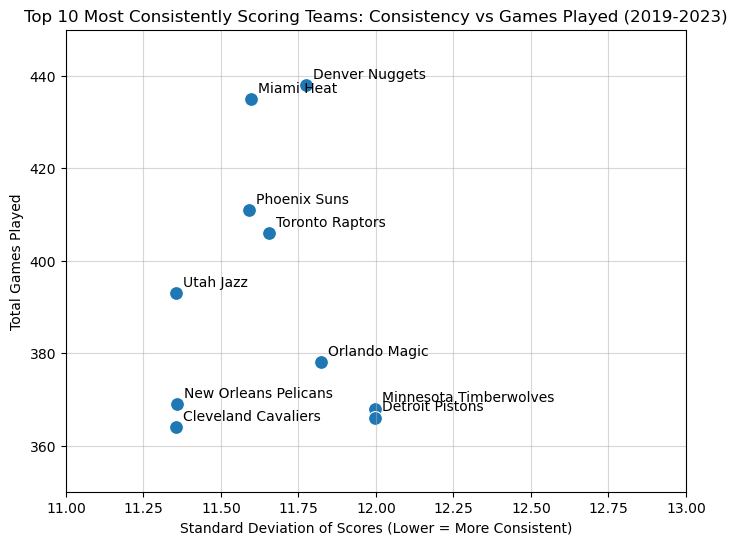

In [58]:
# visualization for Climax - Top 10 teams consistency (games played)
top10_teams_consistent = score_stats_all.reset_index().sort_values(by='std', ascending=True).head(10)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=top10_teams_consistent, 
                x='std', y='total_games', s=100)

# team name label 
for i in range(len(top10_teams_consistent)):
    plt.annotate(top10_teams_consistent['team_name'].iloc[i], 
                (top10_teams_consistent['std'].iloc[i], 
                 top10_teams_consistent['total_games'].iloc[i]),
                xytext=(5, 5), textcoords='offset points')
plt.xlim(11,13)
plt.ylim(350,450)
plt.title('Top 10 Most Consistently Scoring Teams: Consistency vs Games Played (2019-2023)')
plt.xlabel('Standard Deviation of Scores (Lower = More Consistent)')
plt.ylabel('Total Games Played')

plt.grid(True, alpha=0.5)
plt.show()

#### Falling Action

This discovery showed us that being the best isn't just about scoring the most points. It's about being able to perform well game after game. While teams with higher scoring averages might attract immediate attention, the Utah Jazz's combination of strong scoring and consistency supports long-term value appreciation.

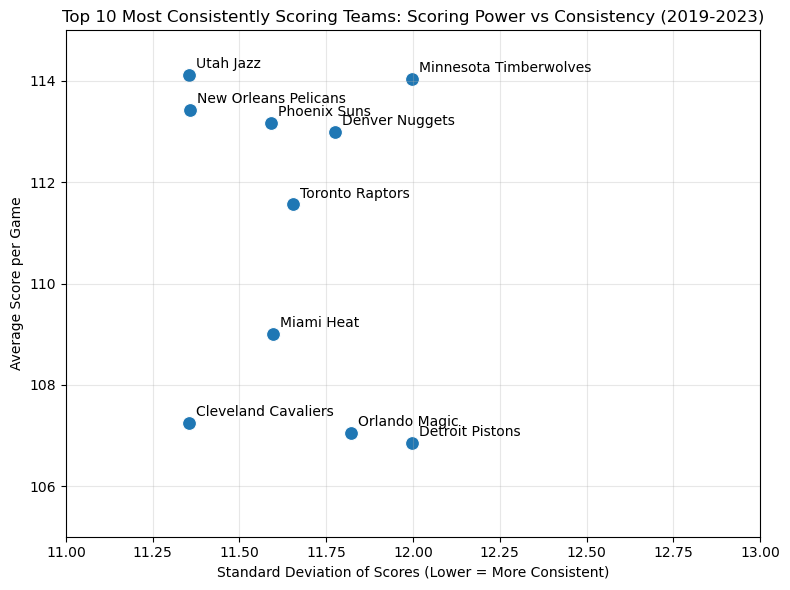

In [90]:
# visualization for Falling action - Top 10 teams consistency (scoring power)

plt.figure(figsize=(8, 6))

sns.scatterplot(data=top10_teams_consistent, 
                x='std', y='mean', s=100)

# team name labels
for i in range(len(top10_teams_consistent)):
    plt.annotate(top10_teams_consistent['team_name'].iloc[i], 
                (top10_teams_consistent['std'].iloc[i], 
                 top10_teams_consistent['mean'].iloc[i]),
                xytext=(5, 5), textcoords='offset points')
plt.xlim(11,13)
plt.ylim(105,115)
plt.title('Top 10 Most Consistently Scoring Teams: Scoring Power vs Consistency (2019-2023)')
plt.xlabel('Standard Deviation of Scores (Lower = More Consistent)')
plt.ylabel('Average Score per Game')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Resolution

Our analysis suggests three investment opportunities:
1. Premium Investment (Utah Jazz): Balance of high scoring and consistency, suggesting strong fundamentals and reliable returns
2. Value Opportunities (New Orleans Pelicans, Phoenix Suns, Denver Nuggets): Strong consistency metrics suggest possible market undervaluation
3. Growth Potential (Minnesota Timberwolves): Higher scoring but more variable
The Utah Jazz’s combination of offensive excellence and consistency makes them a particularly attractive investment option.

/var/folders/b2/t2bk4jsj6dz6nftdjx4m23w00000gn/T/ipykernel_67094/2182984547.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(resolution_data['team_name'], ha='right')
/var/folders/b2/t2bk4jsj6dz6nftdjx4m23w00000gn/T/ipykernel_67094/2182984547.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(resolution_data['team_name'], ha='right')


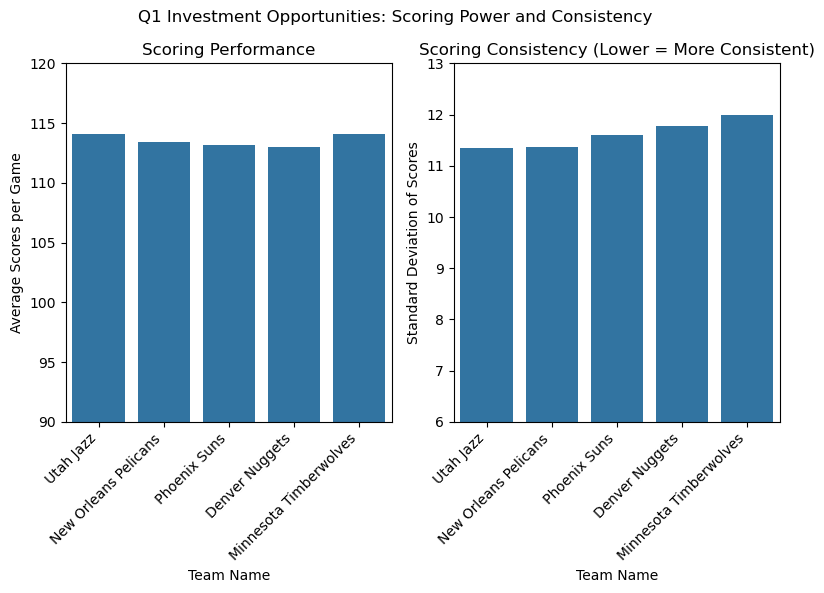

In [289]:
teams_of_interest_q1 = ['Utah Jazz', 'New Orleans Pelicans', 'Phoenix Suns', 
                    'Denver Nuggets', 'Minnesota Timberwolves']
resolution_data = top10_teams_consistent[top10_teams_consistent['team_name'].isin(teams_of_interest_q1)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

# teams of interest - average scores 
sns.barplot(data=resolution_data, x='team_name', y='mean', ax=ax1)
ax1.set_title('Scoring Performance')
ax1.set_xlabel('Team Name')
ax1.set_ylabel('Average Scores per Game')
ax1.tick_params(axis='x', rotation=45)
ax1.set_xticklabels(resolution_data['team_name'], ha='right')
ax1.set_ylim(90, 120)

# teams of interest - sd of scores
sns.barplot(data=resolution_data, x='team_name', y='std', ax=ax2)
ax2.set_title('Scoring Consistency (Lower = More Consistent)')
ax2.set_xlabel('Team Name')
ax2.set_ylabel('Standard Deviation of Scores')
ax2.tick_params(axis='x', rotation=45)
ax2.set_xticklabels(resolution_data['team_name'], ha='right')
ax2.set_ylim(6, 13)

plt.suptitle('Q1 Investment Opportunities: Scoring Power and Consistency')

plt.tight_layout()
plt.show()

#### 2. Which team has had below average for the most consecutive seasons?

#### Introduction

While NBA scoring ability is often viewed as a key indicator of team success, understanding offensive struggles can uncover unique investment opportunities and provide valuable assessment benchmarks. Analyzing scoring patterns across all season types—preseason, regular season, and playoffs—from 2019 to 2023, we identified teams consistently underperforming the league average. These teams may represent undervalued assets or stable yet overlooked options in the market.

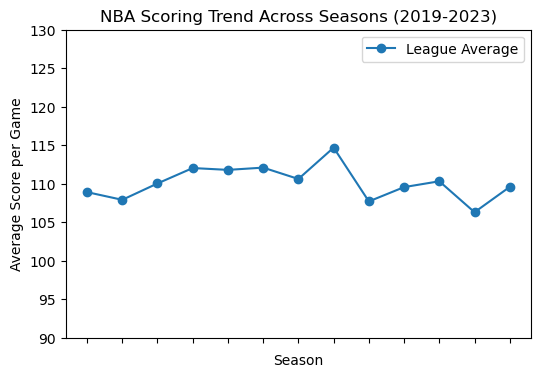

In [122]:
# visualization for introduction - average score across seasons

team_season_avg = team_season_avg.sort_values(by='game_date')
season_across_avg = team_season_avg.groupby('season_id')['points'].mean().reset_index()

plt.figure(figsize=(6,4))
plt.plot(season_across_avg['season_id'], season_across_avg['points'], label='League Average', marker='o')
plt.title('NBA Scoring Trend Across Seasons (2019-2023)')
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.ylim(90,130)
plt.xlabel('Season')
plt.ylabel('Average Score per Game')
plt.legend()
plt.show()

#### Rising Action

Our analysis showed that a league's average scoring was 111.92 points per game, establishing a clear benchmark for team performance evaluation. Using this threshold, we identified teams with persistent offensive challenges, potentially indicating systematic issues that could affect their value.

In [142]:
# average points per season
season_avg = pd.concat([games_recent_5yrs['pts_home'], games_recent_5yrs['pts_away']]).mean() # 111.92

home_games = games_recent_5yrs[['season_id', 'game_date', 'team_id_home', 'team_name_home', 'pts_home']].rename(columns={
    'team_id_home': 'team_id',
    'team_name_home': 'team_name',
    'pts_home': 'points'
})
away_games = games_recent_5yrs[['season_id', 'game_date', 'team_id_away', 'team_name_away', 'pts_away']].rename(columns={
    'team_id_away': 'team_id',
    'team_name_away': 'team_name',
    'pts_away': 'points'
})
all_games = pd.concat([home_games, away_games])

# average points per team per season
team_season_avg = all_games.groupby(['season_id','team_id', 'team_name'])['points'].mean().reset_index()

# below average seasons
team_season_avg['league_avg'] = season_avg
team_season_avg['below_average'] = team_season_avg['points'] < team_season_avg['league_avg']
team_season_avg = team_season_avg.sort_values(['team_id', 'season_id'])
print(team_season_avg.head(10))

    season_id     team_id       team_name      points  league_avg  \
60      12022       15019  Adelaide 36ers  116.000000  111.924325   
0       12020  1610612737   Atlanta Hawks  112.750000  111.924325   
30      12021  1610612737   Atlanta Hawks  103.250000  111.924325   
61      12022  1610612737   Atlanta Hawks  112.750000  111.924325   
92      22018  1610612737   Atlanta Hawks  116.391304  111.924325   
122     22019  1610612737   Atlanta Hawks  111.761194  111.924325   
152     22020  1610612737   Atlanta Hawks  113.694444  111.924325   
182     22021  1610612737   Atlanta Hawks  113.939024  111.924325   
212     22022  1610612737   Atlanta Hawks  118.426829  111.924325   
274     42020  1610612737   Atlanta Hawks  106.277778  111.924325   

     below_average  
60           False  
0            False  
30            True  
61           False  
92           False  
122           True  
152          False  
182          False  
212          False  
274           True  


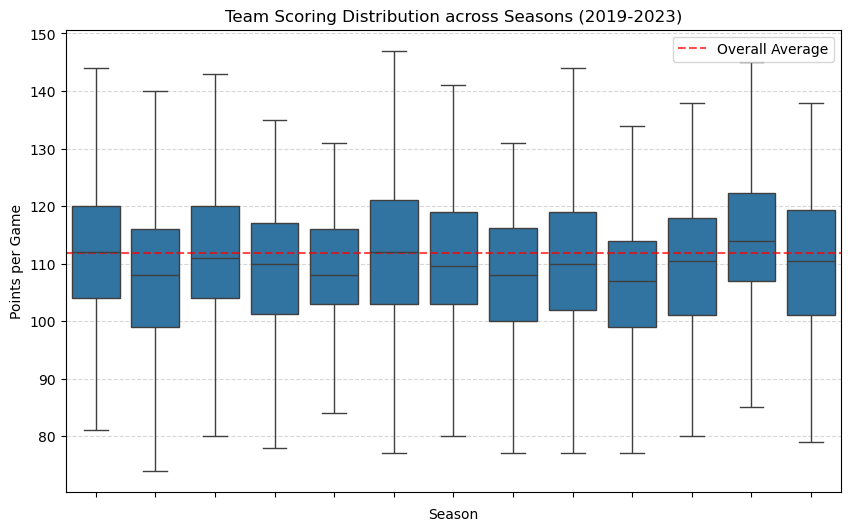

In [202]:
# visualization for rising action - team scores across seasons 
team_season_avg_vis = all_games.groupby(['season_id','game_date', 'team_id', 'team_name'])['points'].mean().reset_index()
team_season_avg_vis = team_season_avg_vis.sort_values(by='game_date')

plt.figure(figsize=(10, 6))
sns.boxplot(data=team_season_avg_vis, x='season_id', y='points',
            showfliers=False)
plt.axhline(y=season_avg, color='r', linestyle='--', alpha=0.7, label='Overall Average')
plt.title('Team Scoring Distribution across Seasons (2019-2023)')
plt.xticks(ticks=plt.xticks()[0], labels=[])

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.xlabel('Season')
plt.ylabel('Points per Game')
plt.legend()

#### Climax

We discovered a striking contrast in scoring consistency across the NBA. The Orlando Magic and Detroit Pistons have notably struggled with scoring, each recording 9 consecutive seasons below the league average - a persistent challenge rather than a temporary slump. The Miami Heat and Cleveland Cavaliers followed with 7-season streaks, suggesting potential value opportunities if these offensive challenges can be addressed.

In [164]:
# consecutive streaks
def consecutive_streak(group):
   current_streak = 0
   max_streak = 0
   
   for below_avg in group:
       if below_avg:
           current_streak += 1
           max_streak = max(max_streak, current_streak)
       else:
           current_streak = 0
           
   return max_streak

team_streaks = team_season_avg.groupby('team_name')['below_average'].apply(consecutive_streak)
team_streaks = team_streaks.sort_values(ascending=False)

print("Teams with most consecutive below-average seasons:")
print(team_streaks.head(10))

Teams with most consecutive below-average seasons:
team_name
Orlando Magic          9
Detroit Pistons        9
Miami Heat             7
Cleveland Cavaliers    7
Charlotte Hornets      5
Houston Rockets        5
San Antonio Spurs      4
Chicago Bulls          4
New York Knicks        4
Los Angeles Lakers     4
Name: below_average, dtype: int64


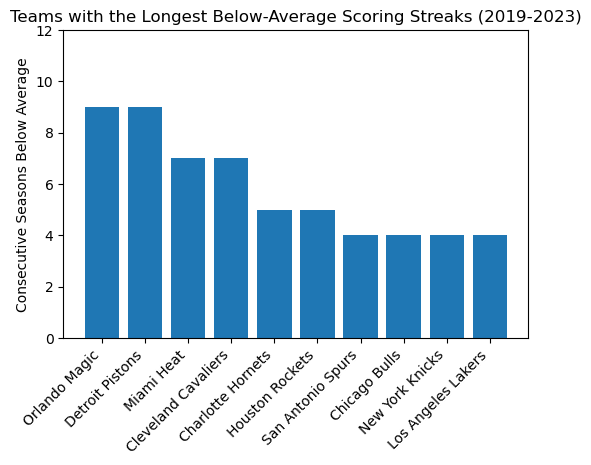

In [171]:
# visualization for climax - Top teams with the longest Below-average streaks

below_average_streaks = team_streaks.sort_values(ascending=False).head(10)

plt.figure(figsize=(6, 4))
plt.bar(below_average_streaks.index, below_average_streaks.values)
plt.title('Teams with the Longest Below-Average Scoring Streaks (2019-2023)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0,12)
plt.ylabel('Consecutive Seasons Below Average')
plt.show()

#### Climax

Meanwhile, teams like the New Orleans Pelicans, Utah Jazz, and Phoenix Suns demonstrated remarkable offensive stability, rarely falling below the league average. This polarization suggests interesting investment implications: while struggling teams might offer value opportunities, consistently strong performers could represent safer, premium investments.

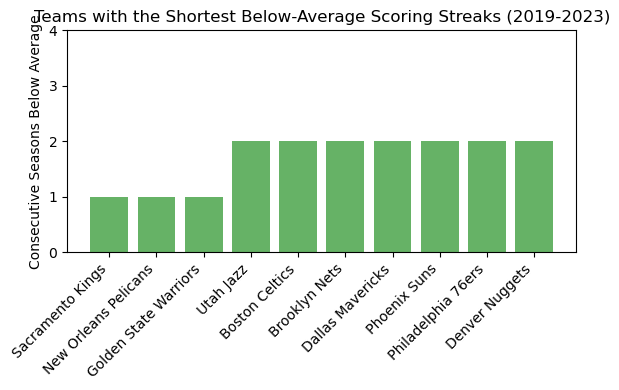

In [175]:
# limit to teams who played over 100 games

valid_teams = score_stats_all[score_stats_all['total_games'] >= 100]['team_name']
team_streaks_filtered = team_streaks[team_streaks.index.isin(valid_teams)]

# visualization for climax - Top teams with the least Below-average streaks
below_average_streaks_rev = team_streaks_filtered.sort_values(ascending=True).head(10)

plt.figure(figsize=(6, 4))
plt.bar(below_average_streaks_rev.index, below_average_streaks_rev.values, color='green', alpha=0.6)
plt.title('Teams with the Shortest Below-Average Scoring Streaks (2019-2023)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0,4)
plt.ylabel('Consecutive Seasons Below Average')
plt.tight_layout()
plt.show()

#### Falling Action

The pattern of below-average scoring extends beyond individual teams. The Charlotte Hornets and Houston Rockets recorded five consecutive seasons of below-average performance, while several prestigious franchises, including the Chicago Bulls, New York Knicks, and even the Los Angeles Lakers, experienced four-season streaks of subpar scoring. This trend highlights a key market insight: a team's historical prestige or market size does not guarantee consistent offensive performance, emphasizing that organizational effectiveness is a critical factor in scoring consistency.

/var/folders/b2/t2bk4jsj6dz6nftdjx4m23w00000gn/T/ipykernel_67094/2340331076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_teams['game_year_Q2'] = pd.to_datetime(selected_teams['game_date']).dt.year


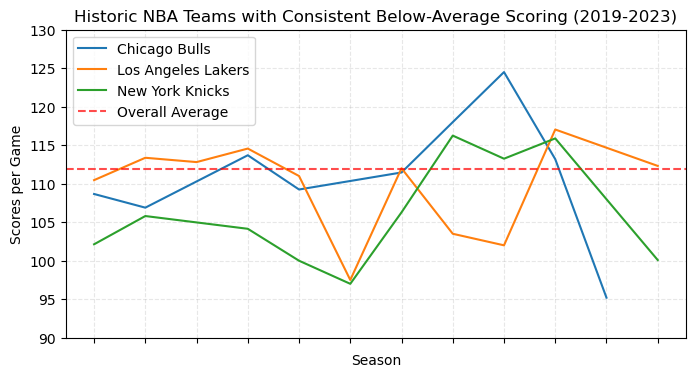

In [205]:
selected_teams = team_season_avg_vis[team_season_avg_vis['team_name'].isin(['Chicago Bulls', 'New York Knicks', 'Los Angeles Lakers'])]
selected_teams['game_year_Q2'] = pd.to_datetime(selected_teams['game_date']).dt.year

yearly_avg_by_team = selected_teams.groupby(['game_year_Q2', 'season_id', 'team_name'])['points'].mean().reset_index()
yearly_avg_by_team = yearly_avg_by_team.sort_values('game_year_Q2')

plt.figure(figsize=(8, 4))
sns.lineplot(data=yearly_avg_by_team, x='season_id', y='points', hue='team_name', errorbar=None)

plt.axhline(y=season_avg, color='r', linestyle='--', label='Overall Average', alpha=0.7)
plt.ylim(90,130)

plt.title('Historic NBA Teams with Consistent Below-Average Scoring (2019-2023)')
plt.xlabel('Season')
plt.ylabel('Scores per Game')
plt.xticks(ticks=plt.xticks()[0], labels=[])

plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

plt.show()

#### Resolution

From an investment perspective, these struggling teams present contrasting opportunities.
1. Premium Investment (Sacramento Kings, Golden State Warriors, New Orleans Pelicans):
Consistently maintains above-average scoring performance
Offers lower risk with proven track record
2. High Risk/High Reward (Orlando Magic, Detroit Pistons, New York Knicks): 
Persistent below-average scoring performance
Significant turnaround potential if structural issues are addressed
Current valuations might reflect underperformance

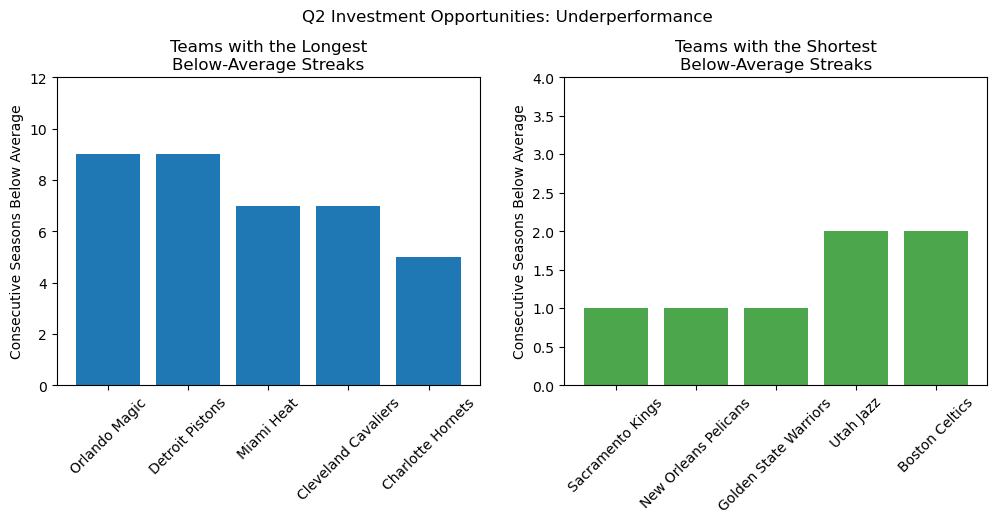

In [302]:
# visualization for resolution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# top 5 longest below average streaks
top5_longest = team_streaks.sort_values(ascending=False).head(5)
ax1.bar(top5_longest.index, top5_longest.values)
ax1.set_title('Teams with the Longest\nBelow-Average Streaks')
ax1.set_ylim(0, 12)
ax1.set_ylabel('Consecutive Seasons Below Average')

# top 5 shortest below average streaks
top5_shortest = team_streaks_filtered.sort_values(ascending=True).head(5)
ax2.bar(top5_shortest.index, top5_shortest.values, color='green', alpha=0.7)
ax2.set_title('Teams with the Shortest\nBelow-Average Streaks')
ax2.set_ylim(0, 4)
ax2.set_ylabel('Consecutive Seasons Below Average')

plt.sca(ax1)
plt.xticks(rotation=45)
plt.sca(ax2)
plt.xticks(rotation=45)

plt.suptitle('Q2 Investment Opportunities: Underperformance', y=1.05)

plt.show()

#### 3. Which team has consistently made it to the playoffs? 

#### Introduction

In the NBA, playoff success is a crucial indicator of a team's value and investment potential. Making the playoffs not only validates a team's competitiveness but also drives revenue through ticket sales, merchandise, and media exposure. We analyzed playoff performance from 2019-2023 to identify which teams have demonstrated the most reliable postseason presence and how this might inform investment decisions.

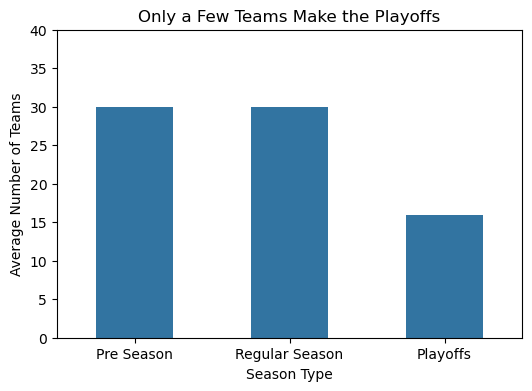

In [363]:
# visualizaiton for introduction

unique_teams = games_recent_5yrs.groupby(['season_id', 'season_type'])['team_name_home'].nunique()
avg_unique_teams = unique_teams.groupby('season_type').mean()

season_order = ['Pre Season', 'Regular Season', 'Playoffs']
avg_unique_teams = avg_unique_teams.reindex(season_order)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_unique_teams.index, y=avg_unique_teams.values, width=0.5)
plt.title('Only a Few Teams Make the Playoffs')
plt.xlabel('Season Type')
plt.ylabel('Average Number of Teams')
plt.ylim(0,40)

plt.show()

#### Rising action

Our analysis revealed interesting patterns in playoff participation. Five teams - the Brooklyn Nets, Denver Nuggets, Philadelphia 76ers, Milwaukee Bucks, and Boston Celtics - achieved a perfect record, making the playoffs in all five seasons. This consistent postseason presence suggests strong organizational stability and reliable performance.

However, playoff appearances alone don't tell the complete story. To truly understand a team's postseason success and potential investment value, we needed to examine how deep these teams went in the playoffs. This meant looking at the total number of playoff games played, which indicates both consistency and championship potential.

In [11]:
# playoff games
playoff_games = games_recent_5yrs[games_recent_5yrs['season_type']=='Playoffs']

# playoff appearances (seasons)
playoff_home_seasons = playoff_games[['season_id', 'team_name_home']].rename(
   columns={'team_name_home': 'team_name'}).drop_duplicates()
playoff_away_seasons = playoff_games[['season_id', 'team_name_away']].rename(
   columns={'team_name_away': 'team_name'}).drop_duplicates()
all_playoff_seasons = pd.concat([playoff_home_seasons, playoff_away_seasons]).drop_duplicates()
playoff_appearances = all_playoff_seasons.groupby('team_name').size().sort_values(ascending=False)
print(playoff_appearances.head())

team_name
Brooklyn Nets         5
Denver Nuggets        5
Philadelphia 76ers    5
Milwaukee Bucks       5
Boston Celtics        5
dtype: int64


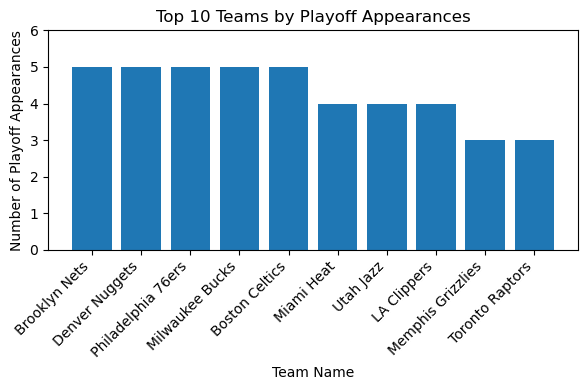

In [368]:
# visualization for rising action

playoff_top_teams = playoff_all.head(10)

plt.figure(figsize=(6, 4))
plt.bar(playoff_top_teams['team_name'], playoff_top_teams['seasons'])

plt.title('Top 10 Teams by Playoff Appearances')
plt.xlabel('Team Name')
plt.ylabel('Number of Playoff Appearances')
plt.ylim(0,6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Climax

During 2019-2023, the Boston Celtics led all teams with 75 playoff games, followed by the Denver Nuggets (68 games) and Miami Heat (66 games). Both the Boston Celtics and Denver Nuggets maintained perfect playoff attendance while achieving high win rates (54.7% and 54.4% respectively), demonstrating consistent excellence. 
The Golden State Warriors’ performance is particularly impressive, reaching 57 games in just 3 playoff appearances (19 average games per season) and the highest win percentage (63%), suggesting they went deep in every playoff they were present.  The Milwaukee Bucks round out the top performers with 65 games and the win percentage (60%) among frequent playoff teams. These metrics showcase why these teams stand out as the NBA's most reliable playoff performers, making them particularly attractive from both competitive and investment perspectives.

In [12]:
# total playoff games (games)
playoff_home_games = playoff_games[['team_name_home', 'game_id']].rename(
   columns={'team_name_home': 'team_name'})
playoff_away_games = playoff_games[['team_name_away', 'game_id']].rename(
   columns={'team_name_away': 'team_name'})
all_playoff_games = pd.concat([playoff_home_games, playoff_away_games])
playoff_games_count = all_playoff_games.groupby('team_name').size()
print(playoff_games_count.head(5))

# playoff appearances, for both seasons & games
playoff_all = pd.DataFrame({
    'team_name': playoff_appearances.index,
    'seasons': playoff_appearances.values,
    'total_games': playoff_games_count[playoff_appearances.index].values
})
print(playoff_all.head(5))

# playoff appearance rate
total_seasons = games_recent_5yrs['season_id'].nunique()
playoff_all['appearance_rate'] = (playoff_all['seasons'] / total_seasons * 100)

# playoff win percentage
home_wins = playoff_games[playoff_games['wl_home'] == 'W'][['team_name_home', 'game_id']].rename(
   columns={'team_name_home': 'team_name'})
away_wins = playoff_games[playoff_games['wl_away'] == 'W'][['team_name_away', 'game_id']].rename(
   columns={'team_name_away': 'team_name'})
all_wins = pd.concat([home_wins, away_wins])
playoff_wins_count = all_wins.groupby('team_name').size()

playoff_all['win_percentage'] = (playoff_wins_count.reindex(playoff_all['team_name']).fillna(0).values / playoff_all['total_games'] * 100)

# average playoff game per season 
playoff_all['games_per_season'] = (playoff_all['total_games'] / playoff_all['seasons'])


print("\nPlayoff appearances and performance (2019-2023):")
print(playoff_all[['team_name', 'seasons', 'appearance_rate', 'total_games', 'games_per_season', 'win_percentage']]
     .sort_values(by='total_games',ascending=False).head(20))

team_name
Atlanta Hawks          29
Boston Celtics         75
Brooklyn Nets          29
Chicago Bulls           5
Cleveland Cavaliers     5
dtype: int64
            team_name  seasons  total_games
0       Brooklyn Nets        5           29
1      Denver Nuggets        5           68
2  Philadelphia 76ers        5           51
3     Milwaukee Bucks        5           65
4      Boston Celtics        5           75

Playoff appearances and performance (2019-2023):
                 team_name  seasons  appearance_rate  total_games  \
4           Boston Celtics        5        38.461538           75   
1           Denver Nuggets        5        38.461538           68   
5               Miami Heat        4        30.769231           66   
3          Milwaukee Bucks        5        38.461538           65   
14   Golden State Warriors        3        23.076923           57   
2       Philadelphia 76ers        5        38.461538           51   
11            Phoenix Suns        3        23.0769

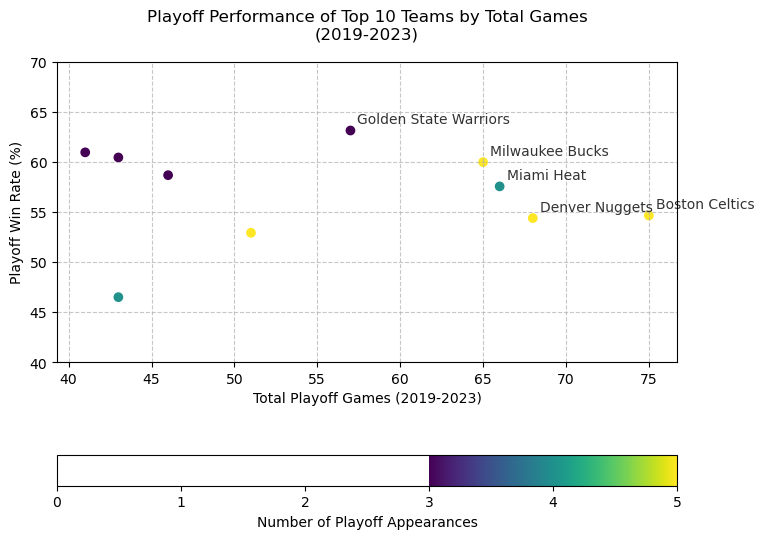

In [387]:
# visualization for climax

top_10_teams_q3 = playoff_all.nlargest(10, 'total_games')

fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(top_10_teams_q3['total_games'], top_10_teams_q3['win_percentage'],
          c=top_10_teams_q3['seasons'])

for idx, row in top_10_teams_q3.nlargest(5, 'total_games').iterrows():
    ax.annotate(row['team_name'],
                xy=(row['total_games'], row['win_percentage']),
                xytext=(5, 5),
                textcoords='offset points',
                alpha=0.8)

plt.xlabel('Total Playoff Games (2019-2023)')
plt.ylabel('Playoff Win Rate (%)')
plt.title('Playoff Performance of Top 10 Teams by Total Games\n(2019-2023)', y=1.05)
plt.ylim(40,70)
plt.grid(True, linestyle='--', alpha=0.7)

cbar = plt.colorbar(scatter, orientation='horizontal', 
                  label='Number of Playoff Appearances',
                  pad=0.2)
cbar.set_ticks(range(6))

plt.show()

#### Falling Action 

On the opposite end of the spectrum, eight teams struggled with playoff consistency, making only one appearance in five years. These included established franchises like the Chicago Bulls (5 games) and Detroit Pistons (4 games). This stark contrast in performance highlights the significant gap between the league's most and least successful teams in terms of postseason achievement.
The data also reveals that historical prestige doesn't guarantee current success, even teams with rich playoff histories can face extended periods of postseason struggles.

In [35]:
print(playoff_all[['team_name', 'seasons', 'appearance_rate', 'total_games', 'games_per_season']].sort_values(by='seasons').head(10))

                team_name  seasons  appearance_rate  total_games  \
28     Washington Wizards        1         7.692308            5   
26    Cleveland Cavaliers        1         7.692308            5   
25      San Antonio Spurs        1         7.692308            7   
24       Sacramento Kings        1         7.692308            7   
23        Detroit Pistons        1         7.692308            4   
22   New Orleans Pelicans        1         7.692308            6   
27          Chicago Bulls        1         7.692308            5   
21          Orlando Magic        2        15.384615           10   
20  Oklahoma City Thunder        2        15.384615           12   
19        New York Knicks        2        15.384615           16   

    games_per_season  
28               5.0  
26               5.0  
25               7.0  
24               7.0  
23               4.0  
22               6.0  
27               5.0  
21               5.0  
20               6.0  
19               8.0 

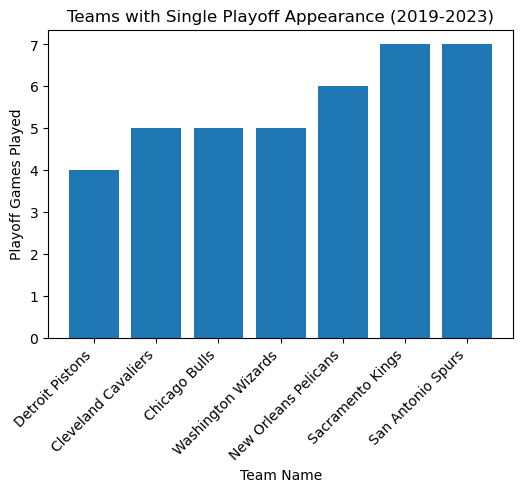

In [388]:
# visualization for falling action

plt.figure(figsize=(6, 4))

playoffs_struggling_teams = playoff_all[playoff_all['seasons'] == 1].sort_values('total_games')
bars = plt.bar(playoffs_struggling_teams['team_name'], playoffs_struggling_teams['total_games'])

plt.title('Teams with Single Playoff Appearance (2019-2023)')
plt.xlabel('Team Name')
plt.ylabel('Playoff Games Played')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Resolution

Based on our analysis, here are the key investment recommendations:
1. Premier Investments (Boston Celtics, Denver Nuggets): Highest playoff game count with perfect attendance, Consistent win rates above 54%, Most reliable returns through consistent playoff success
2. High-Efficiency Plays (Golden State Warriors, Miami Heat): Exceptional playoff performance when qualifying, League-leading win percentages (63% and 57.5%), Strong potential for deep playoff runs despite fewer appearances
3. Stable Value (Milwaukee Bucks, Philadelphia 76ers): Consistent playoff presence, Solid win percentages (60% and 52.9%), Demonstrated potential to advance in postseason

The Boston Celtics and Denver Nuggets stand out as the most attractive investment options, combining reliable playoff qualification with consistent deep runs. The Golden State Warriors' exceptional efficiency metrics suggest particularly strong returns during playoff years, though with slightly higher volatility due to fewer appearances.

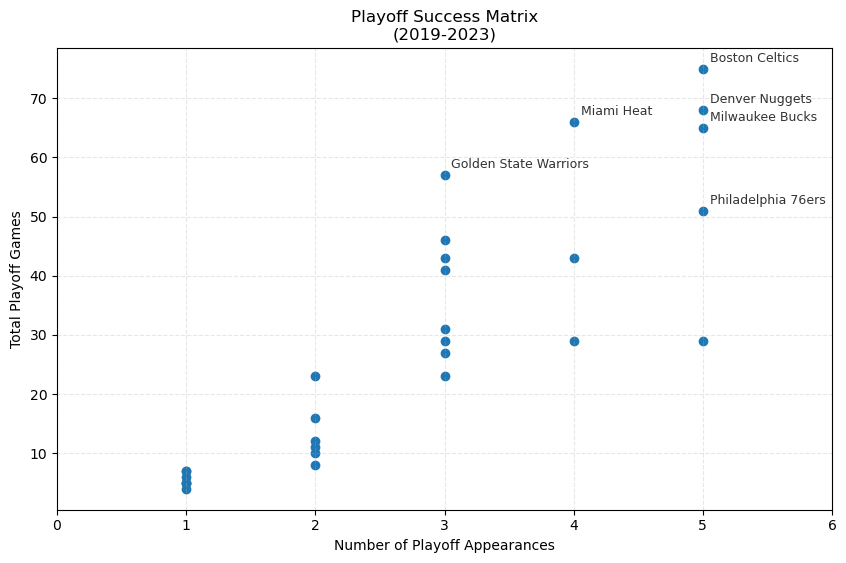

In [390]:
# visualization for resolution

plt.figure(figsize=(10, 6))
plt.scatter(playoff_all['seasons'], playoff_all['total_games'])

teams_of_interest_q3 = ['Boston Celtics', 'Denver Nuggets', 'Golden State Warriors', 
                    'Miami Heat', 'Milwaukee Bucks', 'Philadelphia 76ers']

for idx, row in playoff_all[playoff_all['team_name'].isin(teams_of_interest_q3)].iterrows():
   plt.annotate(row['team_name'],
               xy=(row['seasons'], row['total_games']),
               xytext=(5, 5),
               textcoords='offset points',
               fontsize=9,
               alpha=0.8)
plt.xlabel('Number of Playoff Appearances')
plt.ylabel('Total Playoff Games')
plt.xlim(0,6)
plt.title('Playoff Success Matrix\n(2019-2023)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

#### 4. Which teams have shown the greatest improvement over the past five years?

#### Introduction

A team's ability to improve year after year can be used to predict their future potential. Our previous data has discussed which teams have done 'best' historically, this doesn’t take into consideration which teams may surprise us in the upcoming season . We analyzed scoring patterns from 2019-2023 to identify teams showing the strongest upward trajectories.

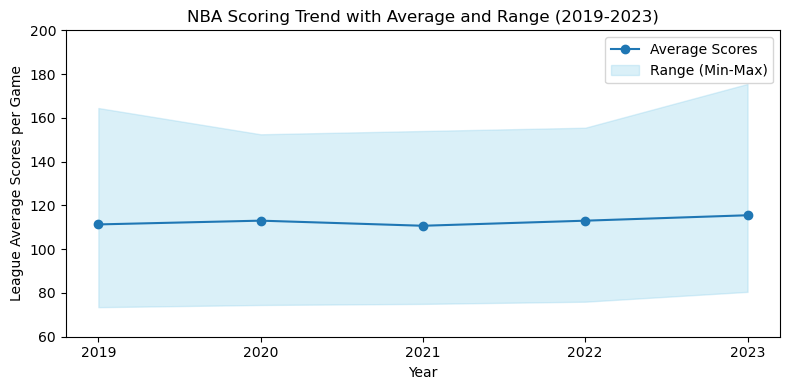

In [311]:
# visualization for introduction

plt.figure(figsize=(8,4))

yearly_stats = regular_games.groupby('game_year').agg({
    'pts_home' : ['mean', 'min', 'max'],
    'pts_away' : ['mean', 'min', 'max']
}).reset_index()

yearly_stats.columns = ['game_year', 'mean_home', 'min_home', 'max_home', 'mean_away', 'min_away', 'max_away']

yearly_stats['points_mean'] = (yearly_stats['mean_home'] + yearly_stats['mean_away']) / 2
yearly_stats['points_min'] = (yearly_stats['min_home'] + yearly_stats['min_away']) / 2
yearly_stats['points_max'] = (yearly_stats['max_home'] + yearly_stats['max_away']) / 2
yearly_avg['game_year'] = yearly_avg['game_year'].astype(int)

plt.plot(yearly_stats['game_year'], yearly_stats['points_mean'], marker='o', label='Average Scores')

plt.fill_between(yearly_stats['game_year'], 
                 yearly_stats['points_min'], 
                 yearly_stats['points_max'], 
                 color='skyblue', alpha=0.3, label='Range (Min-Max)')

plt.xticks(yearly_avg['game_year'])
plt.title('NBA Scoring Trend with Average and Range (2019-2023)')
plt.xlabel('Year')
plt.ylabel('League Average Scores per Game')
plt.ylim(60,200)
plt.legend()
plt.tight_layout()
plt.show()


In [337]:
# extract year from game_date
games_recent_5yrs['game_year'] = pd.to_datetime(games_recent_5yrs['game_date']).dt.year

# limit to regular season
regular_games = games_recent_5yrs[games_recent_5yrs['season_type']=='Regular Season']

# home and away game data 
reg_home_games = regular_games[['team_name_home', 'game_year', 'pts_home']].rename(
    columns={'team_name_home': 'team_name', 'pts_home': 'points'})
reg_away_games = regular_games[['team_name_away', 'game_year', 'pts_away']].rename(
    columns={'team_name_away': 'team_name', 'pts_away': 'points'})
reg_all_games = pd.concat([reg_home_games, reg_away_games])

# average points for each team by year
team_year_avg = reg_all_games.groupby(['team_name', 'game_year'])['points'].mean().reset_index()

# improvement
improvement_list = []

for team in team_year_avg['team_name'].unique():
    team_data = team_year_avg[team_year_avg['team_name'] == team].sort_values('game_year')
    
    total_improvement = team_data['points'].diff().sum() 
    
    improvement_list.append({
        'team_name': team, 
        'total_improvement': total_improvement
    })

team_improvement = pd.DataFrame(improvement_list)
team_improvement = team_improvement.sort_values(by='total_improvement', ascending=False)

print("Teams with the greatest improvement over the past five years:")
print(team_improvement.head(20))

Teams with the greatest improvement over the past five years:
                 team_name  total_improvement
19         New York Knicks          14.695726
25        Sacramento Kings          12.650000
14       Memphis Grizzlies          10.526330
0            Atlanta Hawks           9.028261
11          Indiana Pacers           8.326020
9    Golden State Warriors           7.655134
5      Cleveland Cavaliers           7.627350
13      Los Angeles Lakers           6.813824
20   Oklahoma City Thunder           6.298844
21           Orlando Magic           5.524613
7           Denver Nuggets           5.377463
4            Chicago Bulls           5.149422
1           Boston Celtics           4.875494
28               Utah Jazz           4.740310
22      Philadelphia 76ers           4.458629
6         Dallas Mavericks           4.343460
3        Charlotte Hornets           4.276423
17  Minnesota Timberwolves           4.053968
12             LA Clippers           2.143659
15              Mi

#### Rising action

Looking at regular season games, we discovered interesting patterns in scoring trends. According to the boxplot, the median score has shown a gradual increase from 2019 to 2023. Additionally, the lower end of the box, representing the 25th percentile, indicates that the scoring of the bottom 25% of teams has also risen steadily over the years.

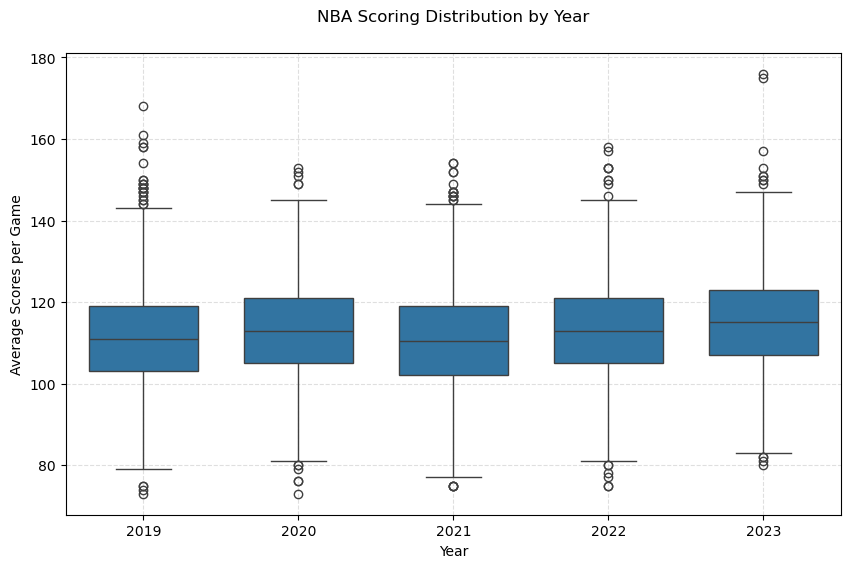

In [338]:
# visualization for rising action

plt.figure(figsize=(10, 6))
sns.boxplot(data=reg_all_games, x='game_year', y='points', width=0.7)
plt.title('NBA Scoring Distribution by Year', y=1.05)
plt.xlabel('Year')
plt.ylabel('Average Scores per Game')
plt.grid(True, linestyle='--', alpha=0.4)

#### Climax

Looking at the data, we uncovered remarkable developments in several NBA teams' scoring capabilities, both positive and negative. The New York Knicks indicated the most improvement with a 14.7-point increase in points-per-game. This was followed by Sacramento Kings and Memphis Grizzlies. In contrast, The Houston Rockets have indicated a decrease in point potential within the past 5 years.

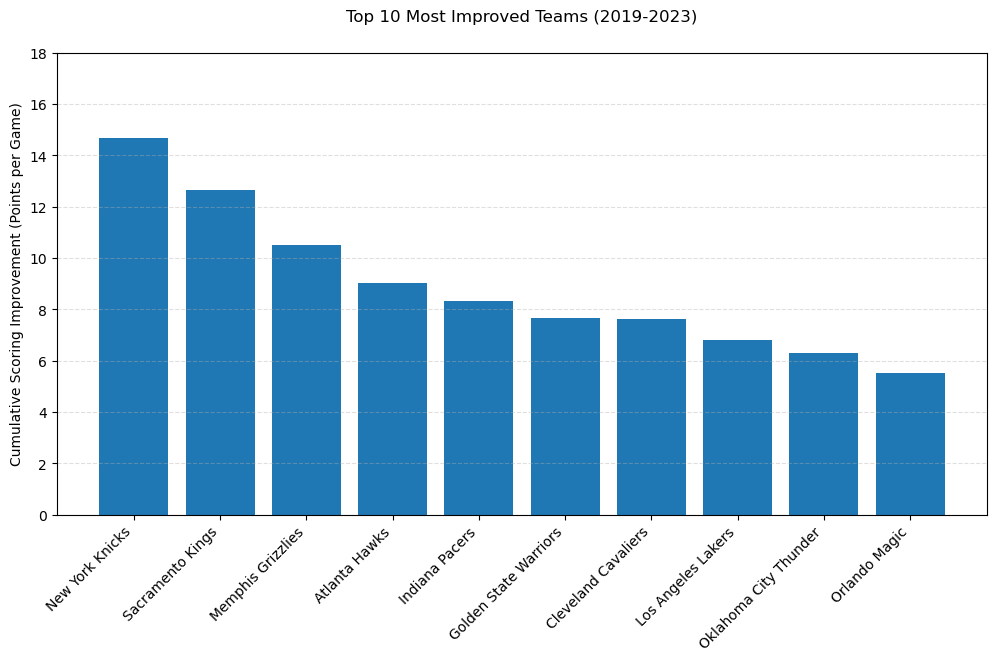

In [340]:
# visualization for climax

top_10 = team_improvement.sort_values(by='total_improvement', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10['team_name'], top_10['total_improvement'])

plt.title('Top 10 Most Improved Teams (2019-2023)', y=1.05)
plt.ylabel('Cumulative Scoring Improvement (Points per Game)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0,18)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

#### Falling action

What makes these improvements even more fascinating is their trajectory. Rather than showing gradual, year-over-year progress, both the New York Knicks and Sacramento Kings displayed sharp inflection points in their scoring output.
Their leap from a bottom-tier offensive team to leading the league in improvement showcased successful strategic shifts could rapidly alter a team's performance ceiling.

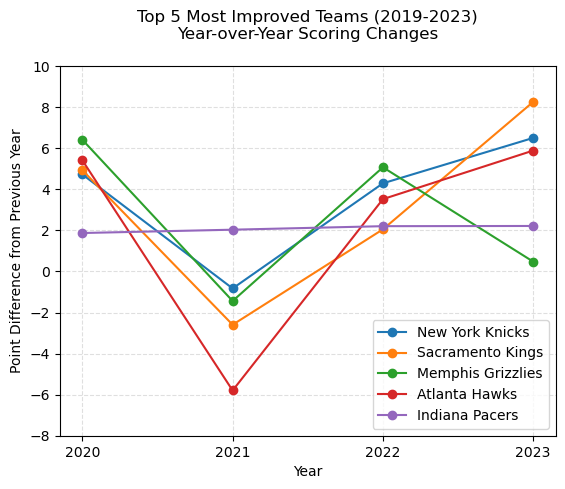

In [345]:
# visualization for falling action - yoy scoring changes

top_5_q4 = team_improvement.sort_values(by='total_improvement', ascending=False)
top_5_q4 = team_improvement.head(5)['team_name']

for team in top_5_q4:
    team_data = team_year_avg[team_year_avg['team_name']==team]
    team_data = team_data.sort_values('game_year')
    changes = team_data['points'].diff()
    plt.plot(team_data['game_year'][1:], changes[1:], marker='o', label=team)

plt.title('Top 5 Most Improved Teams (2019-2023)\nYear-over-Year Scoring Changes', y=1.05)
plt.xlabel('Year')
plt.ylabel('Point Difference from Previous Year')
plt.xticks([2020, 2021, 2022, 2023])
plt.ylim(-8,10)
plt.legend(loc='lower right')
plt.grid(linestyle='--', alpha=0.4)

plt.show()

#### Resolution

Teams who haven’t shown much improvement or have even decreased their scoring ability may still be historical winners. Improvements highlight teams that have successfully modernized their approach – teams that can be winners in the future. The New York Knicks and Sacramento Kings, in particular, have demonstrated the ability to significantly enhance their scoring output, suggesting potential for continued growth and value appreciation.

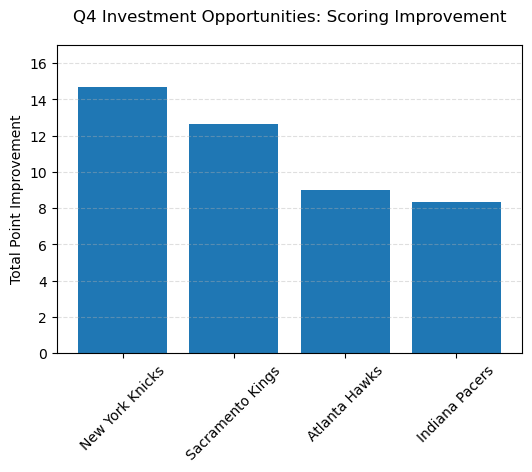

In [358]:
# visualization for resolution
teams_of_interest_q4 = ['New York Knicks', 'Sacramento Kings', 'Atlanta Hawks', 'Indiana Pacers']
team_data_q4 = team_improvement[team_improvement['team_name'].isin(teams_of_interest_q4)]

plt.figure(figsize=(6, 4))

plt.bar(team_data_q4['team_name'], team_data_q4['total_improvement'])
plt.title('Q4 Investment Opportunities: Scoring Improvement', y=1.05)
plt.ylabel('Total Point Improvement')
plt.xticks(rotation=45)
plt.ylim(0,17)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

#### 5. Which teams have demonstrated the best defensive metrics (e.g., blocks and steals), and how has this impacted their winning consistency?

#### Introduction

In the NBA, defensive prowess is often the foundation for championship success. To uncover the impact of defense on team performance, we analyzed key defensive metrics-blocks and steals- from 2019 to 2023. Our goal was to identify teams that not only excel defensively but also maintain consistent winning records. While offensive statistics often dominate headlines, our analysis reveals the role defense plays in driving victories. These insights provide a data-driven perspective, aiding more informed decisions about team valuation and investment strategies.

In [214]:
# home games stats
home_defense = regular_games[['team_name_home', 'blk_home', 'stl_home', 'wl_home']].rename(
   columns={'team_name_home': 'team_name', 
           'blk_home': 'blocks',
           'stl_home': 'steals',
           'wl_home': 'win_loss'})

# away games stats
away_defense = regular_games[['team_name_away', 'blk_away', 'stl_away', 'wl_away']].rename(
   columns={'team_name_away': 'team_name',
           'blk_away': 'blocks', 
           'stl_away': 'steals',
           'wl_away': 'win_loss'})

# defense metrics
all_defense = pd.concat([home_defense, away_defense])
defense_stats = all_defense.groupby('team_name').agg(
    avg_blocks=('blocks', 'mean'),
    avg_steals=('steals', 'mean')
).reset_index()

# win rate 
wins = all_defense[all_defense['win_loss'] == 'W'].groupby('team_name').size()
total_games = all_defense.groupby('team_name').size()
win_rates = (wins / total_games).reset_index(name='win_rate')

# defense rating
defense_analysis = pd.merge(defense_stats, win_rates, on='team_name')
defense_analysis['defense_rating'] = defense_analysis['avg_blocks'] + defense_analysis['avg_steals']
defense_sorted = defense_analysis.sort_values(
   by=['defense_rating', 'win_rate'], 
   ascending=[False, False]
)

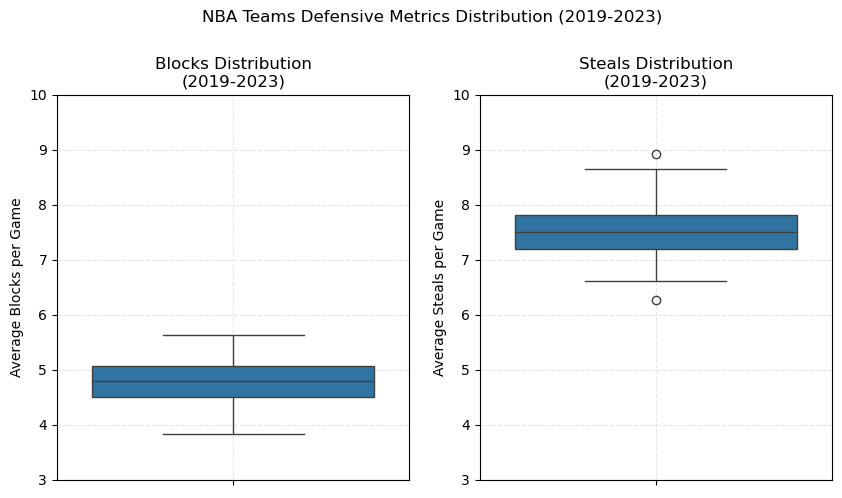

In [259]:
# visualization for introduction - league-wide defense distribution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('NBA Teams'' Defensive Metrics Distribution (2019-2023)', y=1.05)

# blocks
sns.boxplot(data=defense_analysis, y='avg_blocks', ax=ax1)
ax1.set_title('Blocks Distribution\n(2019-2023)')
ax1.set_ylabel('Average Blocks per Game')
ax1.set_ylim(3,10)
plt.sca(ax1)
plt.grid(True, linestyle='--', alpha=0.3)

# steals
sns.boxplot(data=defense_analysis, y='avg_steals', ax=ax2)
ax2.set_title('Steals Distribution\n(2019-2023)')
ax2.set_ylabel('Average Steals per Game')
ax2.set_ylim(3,10)
plt.sca(ax2)
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

#### Rising Action

Our analysis uncovered compelling defensive patterns across NBA teams. The Memphis Grizzlies demonstrated exceptional defensive metrics, leading with 5.62 blocks and 8.65 steals per game, while the Toronto Raptors excelled specifically in steals with 8.91 per game. These metrics stand out historically, but they raise critical investment questions.

To truly understand the investment potential, we needed to look beyond raw defensive statistics. How well do these defensive metrics translate to actual team success? Are teams with elite defensive numbers consistently outperforming the market? By examining the correlation between defensive prowess and winning percentage, we aim to identify teams that combine defensive excellence with proven success - a potential indicator of sustainable long-term value.

In [229]:
print("Teams with the best defensive metrics:")
print(defense_sorted.head(10))

Teams with the best defensive metrics:
                 team_name  avg_blocks  avg_steals  win_rate  defense_rating
14       Memphis Grizzlies    5.619718    8.653521  0.546479       14.273239
27         Toronto Raptors    5.036932    8.914773  0.568182       13.951705
17  Minnesota Timberwolves    5.397101    8.423188  0.431884       13.820290
22      Philadelphia 76ers    5.336158    8.050847  0.635593       13.387006
11          Indiana Pacers    5.576271    7.731638  0.457627       13.307910
1           Boston Celtics    5.485876    7.502825  0.621469       12.988701
13      Los Angeles Lakers    5.355114    7.508523  0.528409       12.863636
9    Golden State Warriors    4.713043    8.043478  0.530435       12.756522
10         Houston Rockets    4.810734    7.892655  0.381356       12.703390
23            Phoenix Suns    4.628895    7.824363  0.577904       12.453258


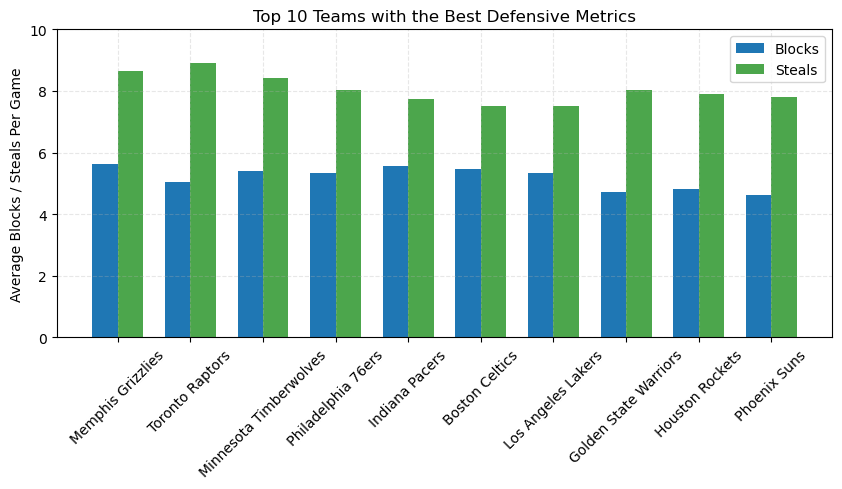

In [280]:
# visualization for rising action

top_10_defense = defense_sorted.sort_values('defense_rating', ascending=False).head(10)

plt.figure(figsize=(10, 4))

# grouped bar chart
x = range(len(top_10_defense['team_name']))

plt.bar(x, top_10_defense['avg_blocks'], width, label='Blocks')
plt.bar([i + width for i in x], top_10_defense['avg_steals'], width, label='Steals', color='green', alpha=0.7)

plt.ylabel('Average Blocks / Steals Per Game')
plt.title('Top 10 Teams with the Best Defensive Metrics')
plt.xticks([i + width/2 for i in x], top_10_defense['team_name'], rotation=45)
plt.ylim(0,10)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

#### Climax

The data reveals a compelling investment story through defensive metrics and winning consistency. The Milwaukee Bucks emerge as the top performer with a league-leading 69.1% win rate while maintaining solid defensive numbers (5.0 blocks, 7.4 steals). Following closely, the Philadelphia 76ers demonstrate exceptional defensive capabilities with 5.3 blocks and 8.1 steals, translating to a 63.6% win rate. The Denver Nuggets and Boston Celtics round out the top tier, each converting strong defensive metrics into win rates above 62%.
Particularly noteworthy is that while teams like the Toronto Raptors show superior defensive statistics (ranking highest in total defense rating at 13.95), their lower win rate (56.8%) suggests challenges in converting defensive excellence into consistent victories.

This pattern indicates that for investment purposes, teams successfully balancing defensive capabilities with winning consistency, like the Bucks and 76ers, represent more stable investment opportunities.


In [248]:
defense_sorted = defense_analysis.sort_values(
   by=['win_rate', 'defense_rating'], 
   ascending=[False, False]
)

print("NBA Defensive Performance and Win Rate by Team:")
print(defense_sorted.head(10))

NBA Defensive Performance and Win Rate by Team:
             team_name  avg_blocks  avg_steals  win_rate  defense_rating
16     Milwaukee Bucks    4.957865    7.359551  0.691011       12.317416
22  Philadelphia 76ers    5.336158    8.050847  0.635593       13.387006
7       Denver Nuggets    4.296919    7.627451  0.630252       11.924370
1       Boston Celtics    5.485876    7.502825  0.621469       12.988701
28           Utah Jazz    5.056657    6.603399  0.606232       11.660057
12         LA Clippers    4.564972    7.211864  0.590395       11.776836
23        Phoenix Suns    4.628895    7.824363  0.577904       12.453258
15          Miami Heat    3.823034    7.676966  0.570225       11.500000
27     Toronto Raptors    5.036932    8.914773  0.568182       13.951705
2        Brooklyn Nets    5.235795    6.821023  0.559659       12.056818


Text(0.5, 1.05, 'Defensive Performance and Win Rate by Team')

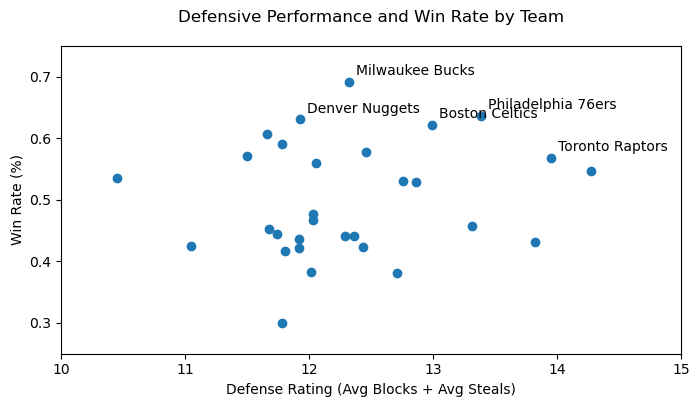

In [262]:
plt.figure(figsize=(8, 4))
plt.scatter(defense_sorted['defense_rating'], 
           defense_sorted['win_rate'])

key_teams = ['Milwaukee Bucks', 'Philadelphia 76ers', 'Denver Nuggets', 
            'Boston Celtics', 'Toronto Raptors']
for _, team in defense_sorted[defense_sorted['team_name'].isin(key_teams)].iterrows():
    plt.annotate(team['team_name'], 
                (team['defense_rating'], team['win_rate']),
                xytext=(5, 5), 
                textcoords='offset points')
plt.ylim(0.25,0.75)
plt.xlim(10,15)
plt.xlabel('Defense Rating (Avg Blocks + Avg Steals)')
plt.ylabel('Win Rate (%)')
plt.title('Defensive Performance and Win Rate by Team', y=1.05)

#### Climax

Analysis reveals surprisingly weak correlations between defensive metrics and winning performance, with blocks (0.223), steals (0.061), and overall defense rating (0.167) showing minimal correlation with win rates. The scatter plots visualize this disconnect clearly - teams with high defensive ratings frequently fail to achieve corresponding win rates.
These findings challenge conventional wisdom about defensive metrics as team performance indicators. For instance, while the Toronto Raptors excel in defensive statistics, their lower win rate demonstrates that defensive prowess alone doesn't guarantee success. The scattered distribution across all metrics suggests investors need a more comprehensive evaluation framework beyond defensive capabilities to assess team potential.


Correlation with win rate:
Blocks: 0.223
Steals: 0.061
Defense Rating: 0.167


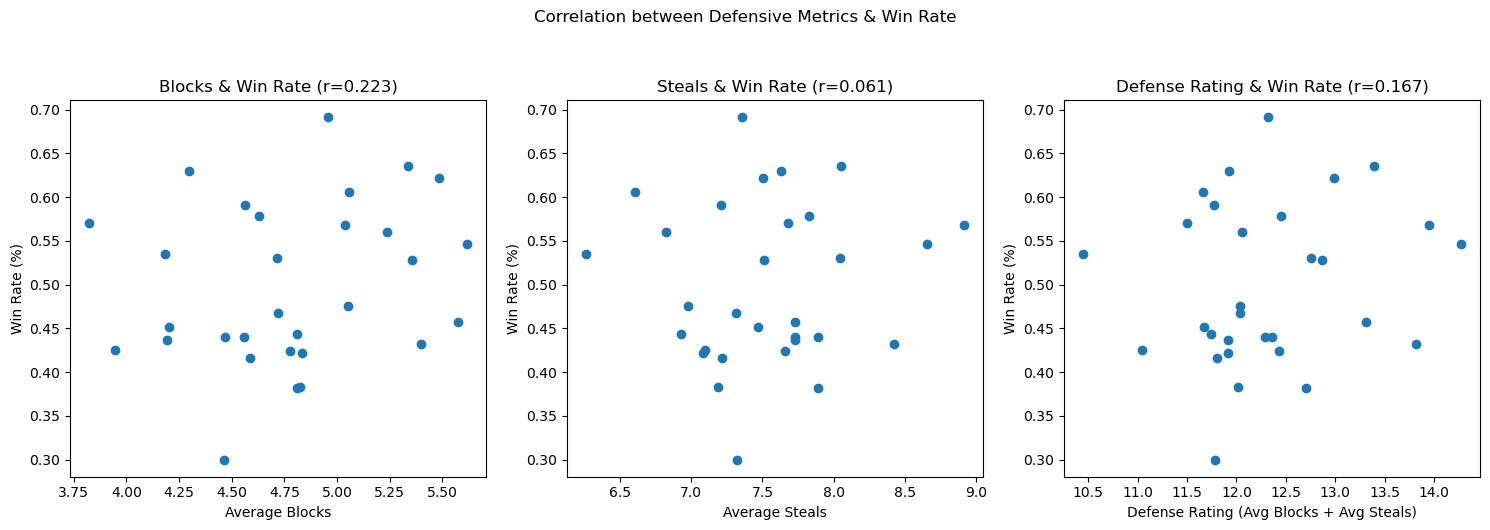

In [271]:
# calculate correlations
correlations = defense_analysis[['avg_blocks', 'avg_steals', 'defense_rating', 'win_rate']].corr()

print("\nCorrelation with win rate:")
print("Blocks:", correlations.loc['avg_blocks', 'win_rate'].round(3))
print("Steals:", correlations.loc['avg_steals', 'win_rate'].round(3))
print("Defense Rating:", correlations.loc['defense_rating', 'win_rate'].round(3))

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(defense_analysis['avg_blocks'], defense_analysis['win_rate'])
ax1.set_title('Blocks & Win Rate (r=0.223)')
ax1.set_xlabel('Average Blocks')
ax1.set_ylabel('Win Rate (%)')

ax2.scatter(defense_analysis['avg_steals'], defense_analysis['win_rate'])
ax2.set_title('Steals & Win Rate (r=0.061)')
ax2.set_xlabel('Average Steals')
ax2.set_ylabel('Win Rate (%)')

ax3.scatter(defense_analysis['defense_rating'], defense_analysis['win_rate'])
ax3.set_title('Defense Rating & Win Rate (r=0.167)')
ax3.set_xlabel('Defense Rating (Avg Blocks + Avg Steals)')
ax3.set_ylabel('Win Rate (%)')

plt.suptitle('Correlation between Defensive Metrics & Win Rate', y=1.05)

plt.tight_layout()
plt.show()

#### Falling action

The disconnect between defensive metrics and win rates has significant market implications. Valuation heavily weighing defensive statistics may be overvaluing certain teams while missing other investment opportunities. This misalignment creates potential market inefficiencies, particularly in teams like the Milwaukee Bucks and Philadelphia 76ers, who demonstrate success beyond pure defensive excellence. Moreover, teams focusing solely on defensive improvement might be misallocating resources, suggesting a need for a more balanced approach to team development and valuation.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Phoenix Suns'),
  Text(1, 0, 'Boston Celtics'),
  Text(2, 0, 'Philadelphia 76ers'),
  Text(3, 0, 'Golden State Warriors'),
  Text(4, 0, 'Los Angeles Lakers'),
  Text(5, 0, 'Toronto Raptors'),
  Text(6, 0, 'Indiana Pacers'),
  Text(7, 0, 'Houston Rockets'),
  Text(8, 0, 'Memphis Grizzlies'),
  Text(9, 0, 'Minnesota Timberwolves')])

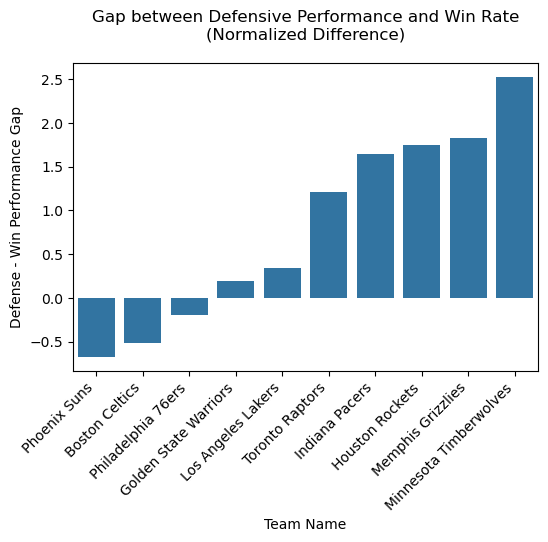

In [288]:
top10_teams_best_defense = ['Memphis Grizzlies','Toronto Raptors','Minnesota Timberwolves','Philadelphia 76ers',\
                            'Indiana Pacers','Boston Celtics','Los Angeles Lakers','Golden State Warriors','Houston Rockets','Phoenix Suns']

# normalization
normalized_defense = (defense_sorted['defense_rating'] - defense_sorted['defense_rating'].mean()) / defense_sorted['defense_rating'].std()
normalized_winrate = (defense_sorted['win_rate'] - defense_sorted['win_rate'].mean()) / defense_sorted['win_rate'].std()
defense_sorted['performance_gap'] = normalized_defense - normalized_winrate

top10_teams_gap = defense_sorted[defense_sorted['team_name'].isin(top10_teams_best_defense)].sort_values('performance_gap')

plt.figure(figsize=(6, 4))
sns.barplot(data=key_teams_gap,
           x='team_name',
           y='performance_gap')
plt.title('Gap between Defensive Performance and Win Rate\n(Normalized Difference)', y=1.05)
plt.xlabel('Team Name')
plt.ylabel('Defense - Win Performance Gap')
plt.xticks(rotation=45, ha='right')


#### Resolution

Based on our analysis, we identify three distinct investment categories:

1. Premium Investments (Milwaukee Bucks, Philadelphia 76ers):
 - Balance of defensive capability and winning consistency
 - Proven ability to convert defensive skills into victories
 - Most stable investment prospects
2. Value Opportunities (Denver Nuggets, Boston Celtics):
 - Strong overall performance metrics
 - Effective translation of defensive capabilities into wins
3. Cautionary Investments (Toronto Raptors, Memphis Grizzlies):
 - Superior defensive statistics but lower win rates
 - Need for additional performance factors beyond defense
 - Higher risk profile despite strong defensive metrics

The Milwaukee Bucks and Philadelphia 76ers stand out as particularly attractive investments, demonstrating the crucial balance between defensive capabilities and consistent winning performance.

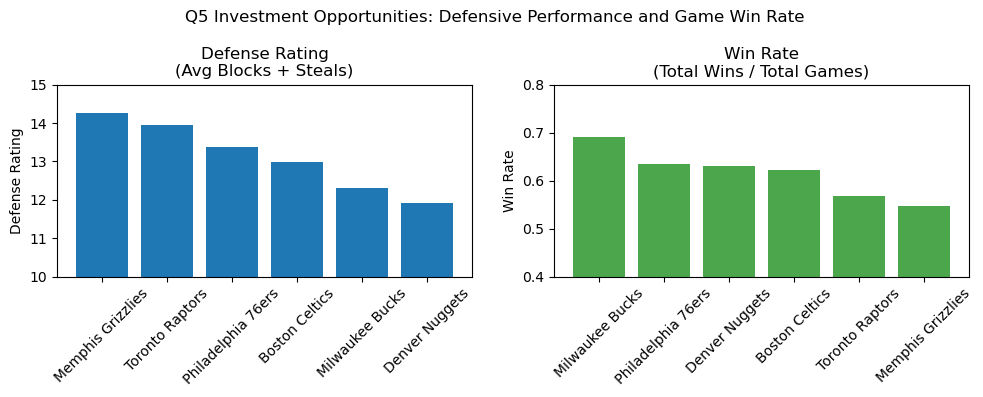

In [300]:
# visualization for resolution

team_of_interest_q5 = ['Milwaukee Bucks', 'Philadelphia 76ers', 'Denver Nuggets', 'Boston Celtics', 'Toronto Raptors', 'Memphis Grizzlies']
team_data_q5 = defense_sorted[defense_sorted['team_name'].isin(team_of_interest_q5)]

defense_sorted_vis = team_data_q5.sort_values('defense_rating', ascending=False)
winrate_sorted_vis = team_data_q5.sort_values('win_rate', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# defense rating
ax1.bar(defense_sorted_vis['team_name'], defense_sorted_vis['defense_rating'])
ax1.set_title('Defense Rating\n(Avg Blocks + Steals)')
ax1.set_ylabel('Defense Rating')
ax1.set_ylim(10, 15)

# win rate
ax2.bar(winrate_sorted_vis['team_name'], winrate_sorted_vis['win_rate'], color='green', alpha=0.7)
ax2.set_title('Win Rate\n(Total Wins / Total Games)')
ax2.set_ylabel('Win Rate')
ax2.set_ylim(0.4, 0.8)

plt.sca(ax1)
plt.xticks(rotation=45)
plt.sca(ax2)
plt.xticks(rotation=45)

plt.suptitle('Q5 Investment Opportunities: Defensive Performance and Game Win Rate')

plt.tight_layout()
plt.show()